In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# View more columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
dataset = pd.read_csv("train.csv")

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Dimension of the dataset
print("Number of rows in dataset is {0}".format(dataset.shape[0]))
print("Number of columns in dataset is {0}".format(dataset.shape[1]))

Number of rows in dataset is 1460
Number of columns in dataset is 81


### Data Comparision

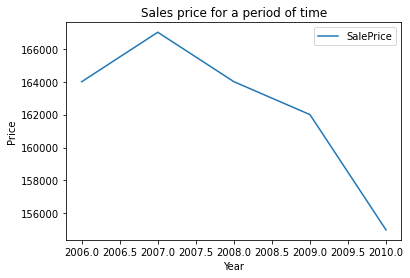

In [7]:
'''Relation between "YrSold" and "SalePrice" '''
year_sold = pd.pivot_table(data=dataset, values="SalePrice", index="YrSold", aggfunc=np.median)
year_sold.plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Sales price for a period of time")
plt.show()

<b>Inference:</b>
                
         Housing price are decreasing over a period of time.

In [8]:
'''Splitting columns into numerical, Categorical, discrete columns to make analysis easier'''
object_dataset  = dataset.select_dtypes(include = "object")
numeric_dataset = dataset.select_dtypes(exclude = "object")

object_dataset.shape , numeric_dataset.shape

((1460, 43), (1460, 38))

In [9]:
'''Numerical data contains Continous, discrete, time-date based columns extracting them without including "Id" column'''

year       = [ column for column in numeric_dataset if "Yr" in column or "Year" in column ]
continious = [ column for column in numeric_dataset if numeric_dataset[column].nunique()>25 and column not in year+["Id"] ]
discrete   = [ column for column in numeric_dataset if column not in year+continious+["Id"] ]

print(f"Number of Year based columns is {len(year)}")
print(f"Number of continous columns is {len(continious)}")
print(f"Number of discrete columns is {len(discrete)}")

Number of Year based columns is 4
Number of continous columns is 16
Number of discrete columns is 17


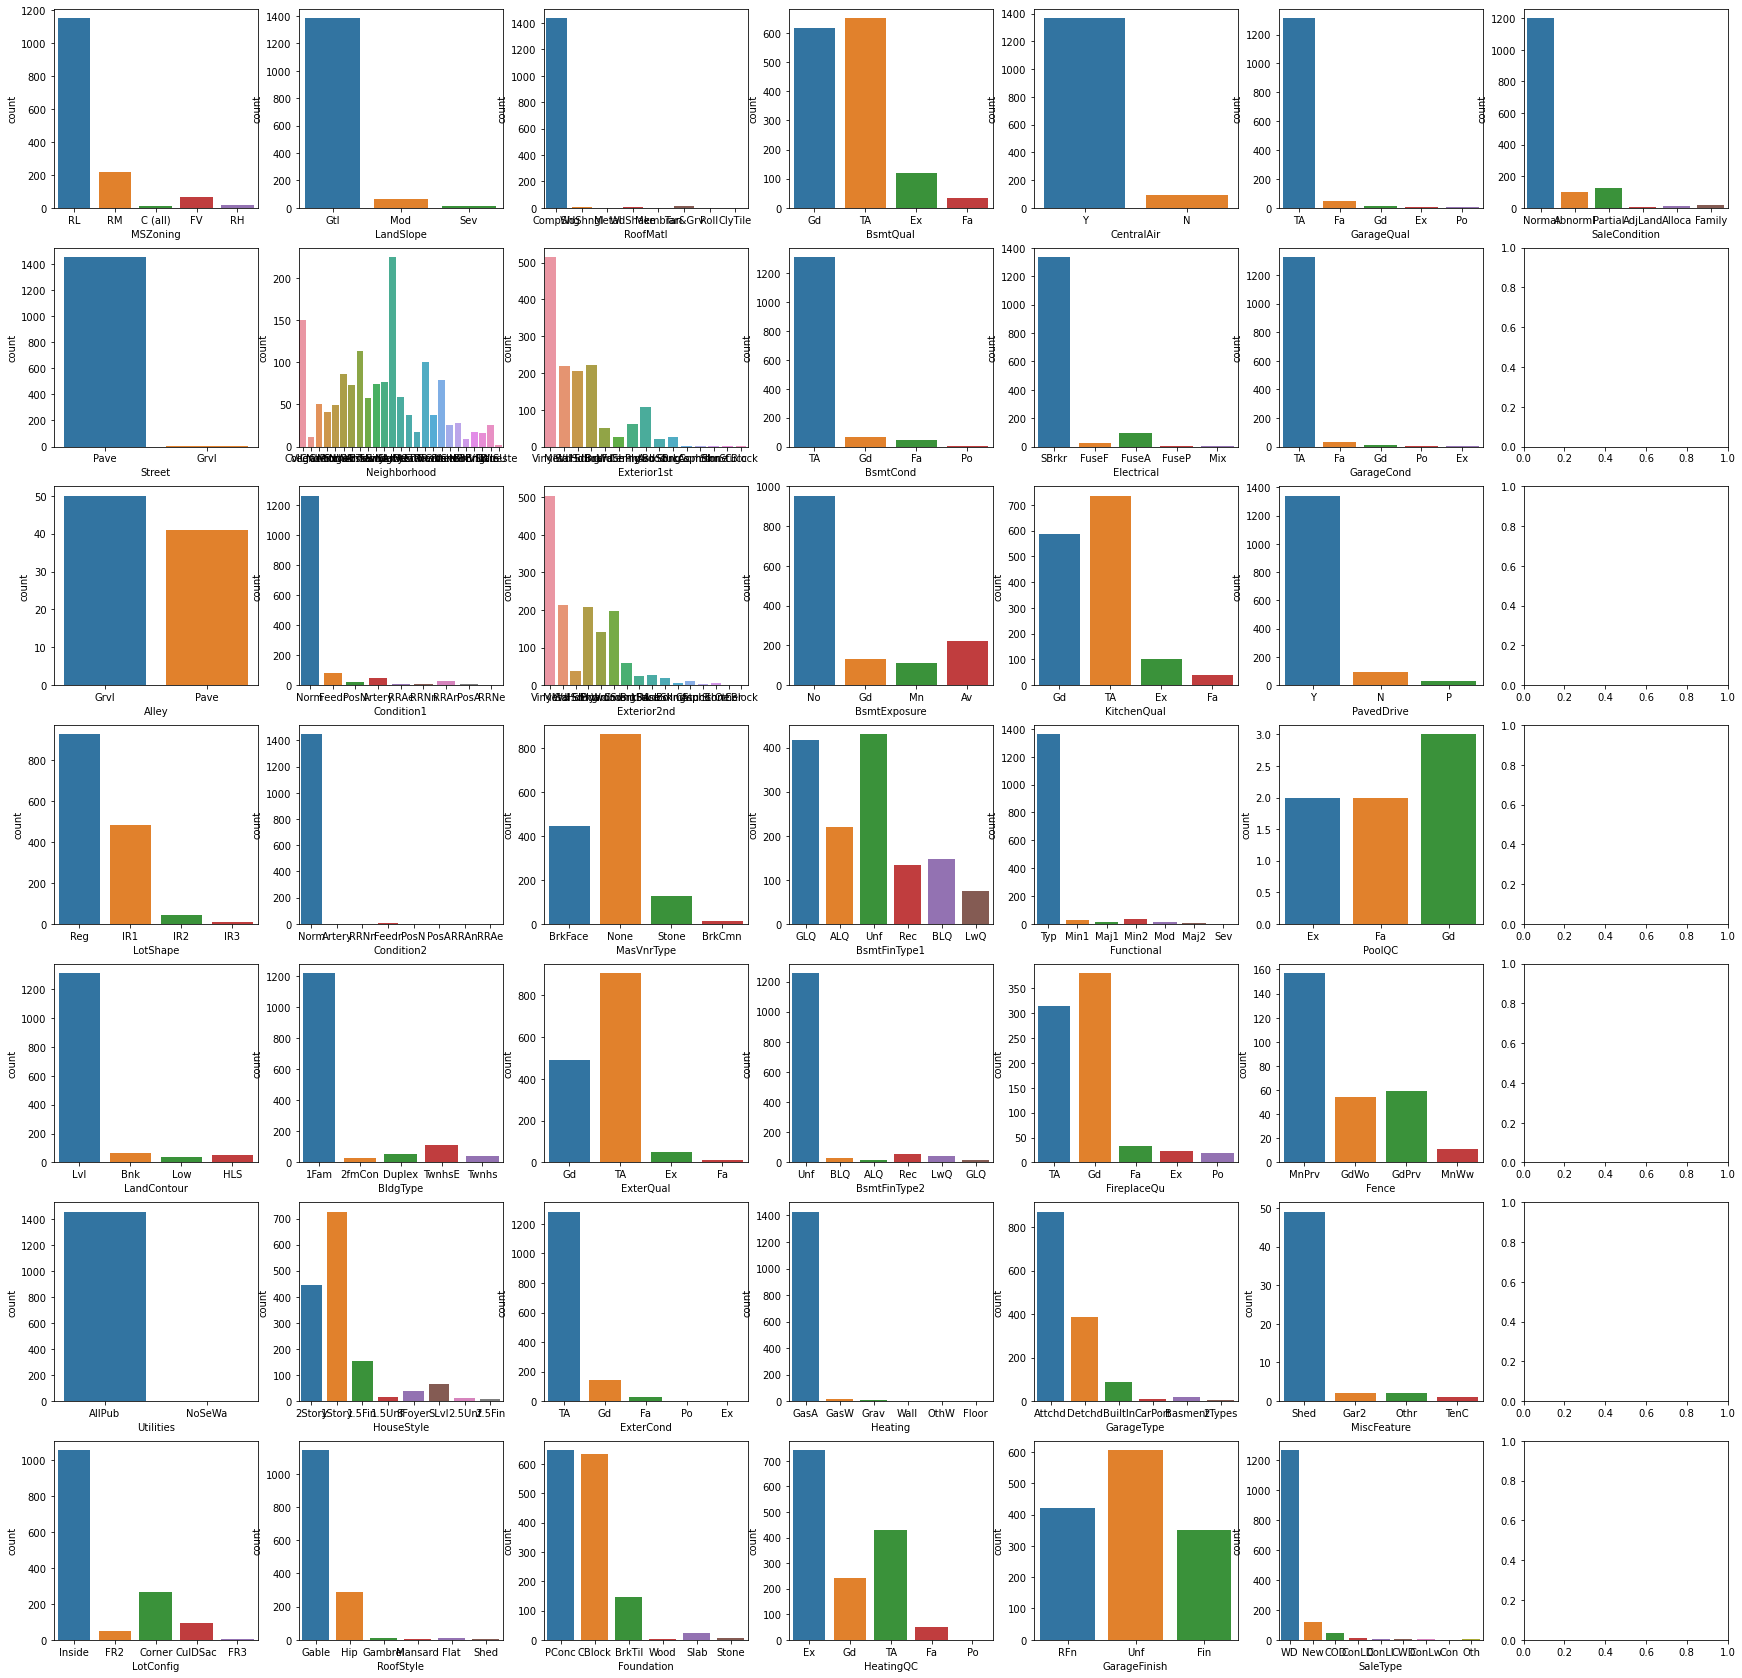

In [10]:
'''Visualise Categorical Data'''

fig, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(object_dataset.columns):
    sns.countplot(data = dataset, x = feature, ax=axes[i%7, i//7])

<b>Inference:</b>
             
             1. We can cleary see that some features are imbalanced and doesn't help us in prediction.
                Ex: 'RoofMatl','Street','Condition2','Utilities','Heating' (These columns should be dropped)
             2. Columns having 'Fa' & 'Po' are need to be coupled together inorder to overcome data imbalance.
                Ex: "ExterCond", "Bsmtcond", "ExterQual", "FireplaceQu", "KitchenQual".

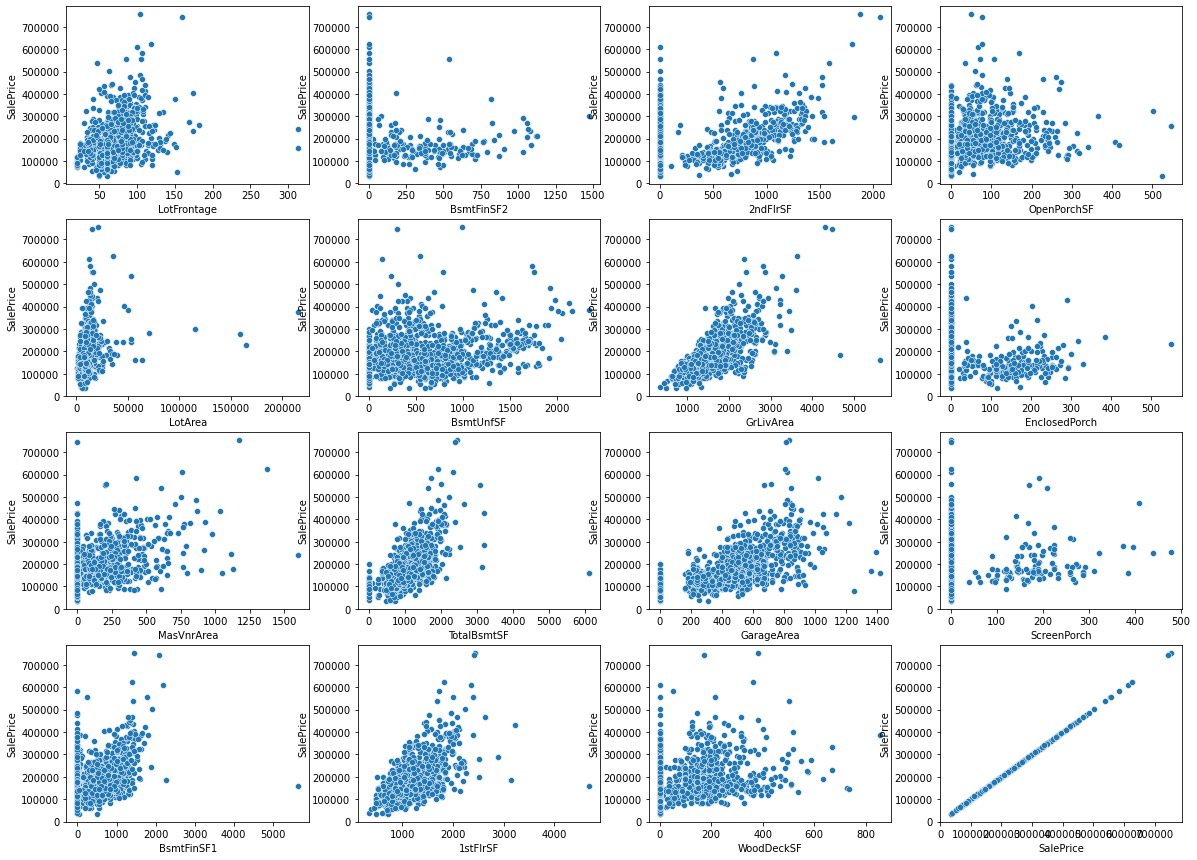

In [11]:
'''Visualise continous data'''

fig, axes = plt.subplots(4,4 , figsize=(20,15), sharex=False)
for i, column in enumerate(continious):
    sns.scatterplot(data=dataset, x = column,y = dataset["SalePrice"], ax=axes[i%4, i//4]) 

<b>Inference:</b>
            
            Some features that are non-linear with the target feature "SalePrice"- 
            'SalePrice' VS.'BsmtUnfSF',
            'SalePrice' VS.'TotalBsmtSF',
            'SalePrice' VS.'GarageArea',
            'SalePrice' VS.'LotArea',
            'SalePrice' VS.'LotFrontage',
            'SalePrice' VS.'GrLivArea',
            'SalePrice' VS.'1stFlrSF', we will treat them later.

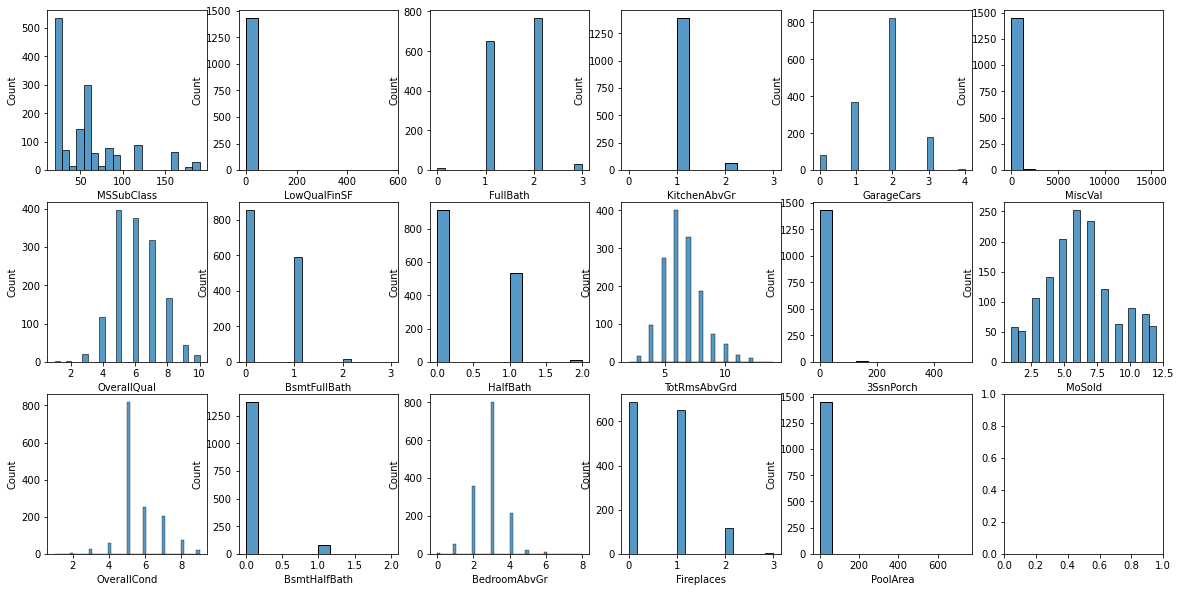

In [12]:
'''Visualise discrete data'''
fig, axes = plt.subplots(3,6 , figsize=(20,10), sharex=False)
for i, column in enumerate(discrete):
    sns.histplot(data=dataset, x=column, ax=axes[i%3, i//3]) 

<b>Inference:</b>

            1. "MSSubClass" feature can be reclassified as "Categorical" type.
            2. Some features are dominated by 0/null (eg:PoolArea, LowQualFinSF, 3SsnPorch, MiscVal), hence we can drop.

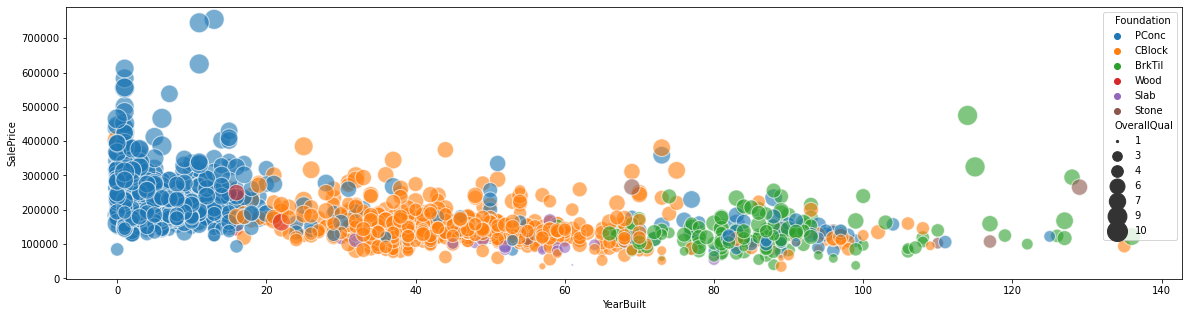

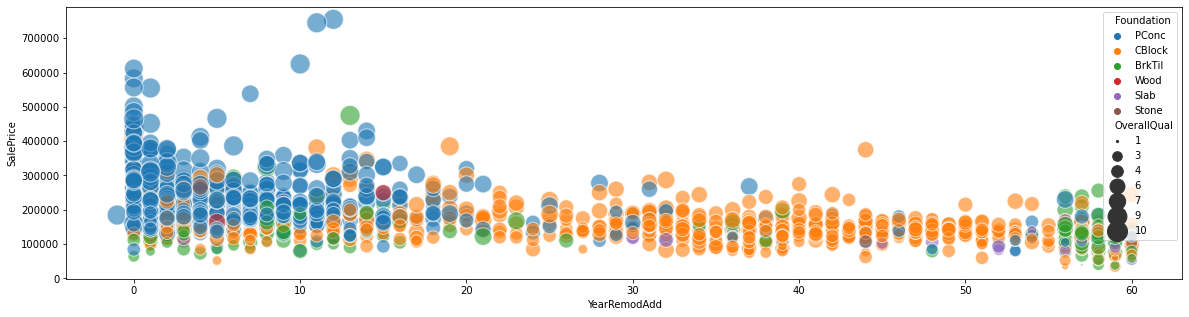

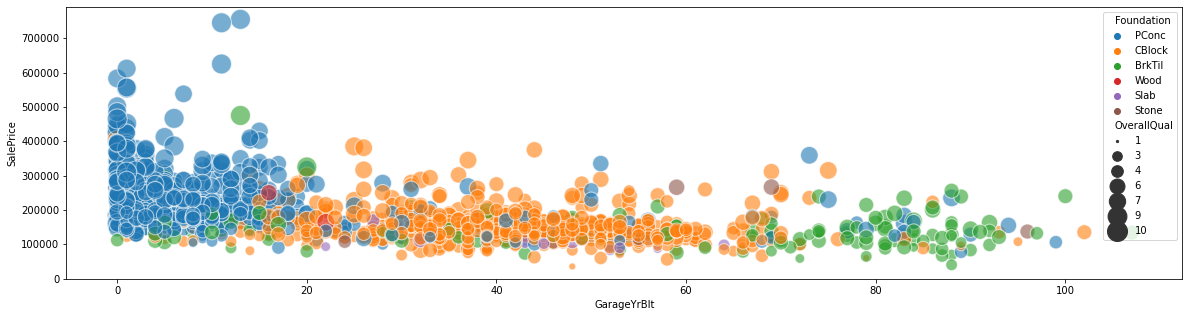

In [13]:
'''Visualise the maintenance/condtion of the building, customer who is about to buy'''

for column in year:
    if column!="YrSold":
        df = dataset.copy()
        df[column] = df["YrSold"]-df[column]
        plt.figure(figsize=(20,5))
        sns.scatterplot(data=df, x=column, y=df["SalePrice"], alpha=0.6, 
                        hue=df["Foundation"], size=df["OverallQual"], sizes=(5,400))
        plt.show()

<b>Inference:</b>

            1. Customer's budget ($ 10,00,000 - 35,00,000 $) contains all ages of house. Hence, better to look into
               years after renovated and the type of foundation the building possess("Poured Concrete is best").
            2. House and garage with moderate quality are in between 20-70 years.
            3. Buying a new/renovated house (0-15years) would be great investment.
            4. Customer buying a house whose lifespan above 75years wouldn't be a good choice.

<b>Inference:</b>

            Some features highly corelated and are need to be removed. Eg: GarageArea, TotRmsAbvGrd, GarageYrBlt,
            1stFlrSF.

### Handling Missing values

In [14]:
'''Null values- percentage of nulls with datatype'''
def missing_data(df):
    null = df.isnull().sum().sort_values(ascending=False)
    
    null = null[null>0]
    percent_null = round(100*(null/df.shape[0]), 2)
    dtype = df[null.index].dtypes  #Fetch datatype
    null_data = pd.concat([percent_null,null, dtype], axis=1)
    null_data.rename(columns={0:"Null %", 1:"Cnt", 2:"Data type"}, inplace=True)
    return null_data

missing_data(dataset)

,Null %,Cnt,Data type
PoolQC,99.52,1453,object
MiscFeature,96.30,1406,object
Alley,93.77,1369,object
Fence,80.75,1179,object
FireplaceQu,47.26,690,object
LotFrontage,17.74,259,float64
GarageYrBlt,5.55,81,float64
GarageCond,5.55,81,object
GarageType,5.55,81,object
GarageFinish,5.55,81,object


In [15]:
# Display percentage over the plots.
def Percent(plot, feature):
    total = len(dataset)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.25
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)
    plt.show()

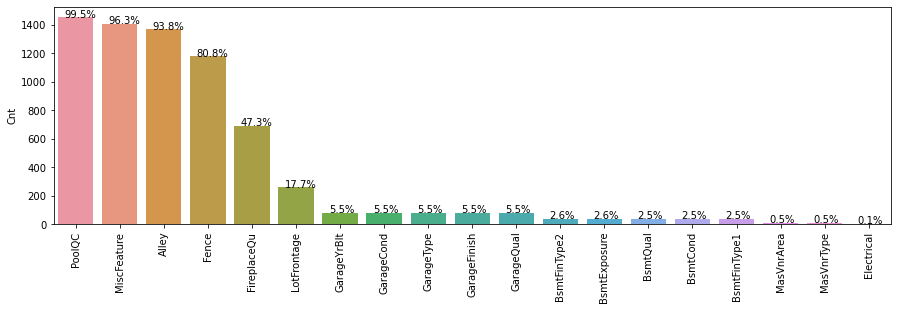

In [16]:
null_data = missing_data(dataset) 

plt.figure(figsize=(15,4))
ax = sns.barplot(x=null_data.index,y="Cnt", data=null_data)
plt.xticks(rotation=90)
Percent(ax, null_data)
plt.show()

In [17]:
'''Drop unwanted Columns like Id, More missing values and imbalance in the data'''

drop_columns = ["Id","PoolQC","MiscFeature", "Alley", "Fence", 
                "PoolArea", "LowQualFinSF", "3SsnPorch", "MiscVal", 
                "RoofMatl","Street","Condition2","Utilities","Heating"]

dataset.drop(columns=drop_columns, inplace=True)

dataset.shape

(1460, 67)

In [18]:
missing_data(dataset)

,Null %,Cnt,Data type
FireplaceQu,47.26,690,object
LotFrontage,17.74,259,float64
GarageQual,5.55,81,object
GarageType,5.55,81,object
GarageYrBlt,5.55,81,float64
GarageFinish,5.55,81,object
GarageCond,5.55,81,object
BsmtExposure,2.60,38,object
BsmtFinType2,2.60,38,object
BsmtQual,2.53,37,object


In [19]:
'''Map/Convert the NA (Not Available) to "none" (Not Present in f) for easy analysis'''

for column in dataset.columns:
    if dataset[column].dtype == "object":
        if column.startswith("Bsmt") or column.startswith("Garage"):
            dataset[column].fillna("none", inplace=True)    

In [20]:
# Impute missing values
dataset["MasVnrType"].mode()[0]

'None'

In [21]:
# Impute missing values
dataset["Electrical"].mode()[0]

'SBrkr'

In [22]:
# Impute missing values
dataset["FireplaceQu"].mode()[0]

'Gd'

In [23]:
# sns.boxplot(dataset["MasVnrArea"])

# Impute missing values
dataset["MasVnrArea"].median()

0.0

In [24]:
# sns.boxplot(dataset["LotFrontage"])

# Impute missing values
dataset["LotFrontage"].median()

69.0

In [25]:
# Imputation of Null-values
dataset["GarageYrBlt"].fillna( dataset["GarageYrBlt"].mean(),    inplace=True)
dataset["MasVnrArea"].fillna ( dataset["MasVnrArea"].median(),   inplace=True)
dataset["LotFrontage"].fillna(dataset["LotFrontage"].median(),   inplace=True)
dataset["MasVnrType"].fillna ( dataset["MasVnrType"].mode()[0],  inplace=True)
dataset["Electrical"].fillna ( dataset["Electrical"].mode()[0],  inplace=True)
dataset["FireplaceQu"].fillna("none", inplace=True)

### Check Datatype

In [26]:
# check the datatype of each column
# GarageYrBlt
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].astype(np.int64)
dataset["MasVnrArea"] = dataset["MasVnrArea"].astype(np.int64)
dataset["MSSubClass"] = dataset["MSSubClass"].astype(str)
dataset["OverallQual"] = dataset["OverallQual"].astype(str)
dataset["OverallCond"] = dataset["OverallCond"].astype(str)

In [27]:
'''Misssing values are handled'''

print(missing_data(dataset) )
print(''' No null values ''')

Empty DataFrame
Columns: [Null %, Cnt, Data type]
Index: []
 No null values 


### Imputation in categorical columns

In [28]:
'''Some categorical features are skewed. Lets handle them by grouping'''

Categorical_skew = ["RoofStyle","Exterior1st", "Exterior2nd","ExterCond","BsmtFinType2", "ExterQual", 
                    "Foundation","BsmtQual","BsmtCond","HeatingQC", "Electrical", "KitchenQual",
                    "Functional","FireplaceQu", "GarageType","GarageQual","GarageCond","SaleType","SaleCondition"]

cat_skew_dictionary = {
    
    "LotShape"     : ["IR2","IR3"],
    "LotConfig"    : ["FR2","FR3"],
    "Condition1"   : ["RRAe","PosA","RRNn","RRNe"],
    "HouseStyle"   : ["1.5Unf","2.5Unf","2.5Fin"],
    "RoofStyle"    : ["Flat","Gambrel","Mansard","Shed"],
    "Exterior1st"  : ["BrkComm","BrkComm", "CBlock", "ImStucc","AsphShn"],
    "Exterior2nd"  : ["ImStucc","Brk Cmn", "Stone", "AsphShn","CBlock", "Other"],
    "ExterCond"    : ["Ex","Po"],
    "BsmtFinType2" : ["GLQ","ALQ"],
    "ExterQual"    : ["Ex","Fa"],
    "Foundation"   : ["Slab", "Stone", "Wood"],
    "BsmtQual"     : ["Ex","Fa", "none"],
    "BsmtCond"     : ["Po","Fa", "none"],
    "HeatingQC"    : ["Po","Fa"],
    "KitchenQual"  : ["Ex","Fa"],
    "Functional"   : ["Maj1", "Maj2", "Sev"],
    "FireplaceQu"  : ["Ex","Po"],
    "GarageType"   : ["Basment","CarPort","2Types"],
    "GarageQual"   : ["Gd","Ex","Po"],
    "GarageCond"   : ["Gd","Ex","Po"],
    "SaleType"     : ["ConLD", "ConLw", "ConLI","CWD","Oth","Con"],
    "SaleCondition": ["Family","Alloca","AdjLand"]
}

In [29]:
for column, value in cat_skew_dictionary.items():
    check = dataset[column].isin(value)
    dataset[column][check] = "Other"

In [30]:
'''Features imbalance'''
drop = ["LandSlope","Functional","BsmtCond","Electrical","GarageQual","GarageCond"]

The Target varibale is skewed by 1.8828757597682129


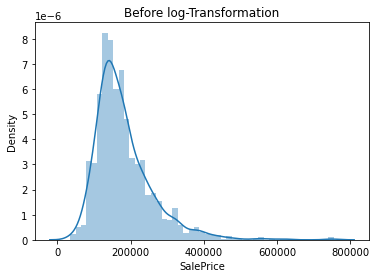

In [32]:
'''Check the skewness on Target variable'''
print(f"The Target varibale is skewed by {dataset.SalePrice.skew()}")
sns.distplot(dataset.SalePrice, kde=True)
plt.title('Before log-Transformation')
plt.show()

The Target varibale is skewed by 0.12133506220520406


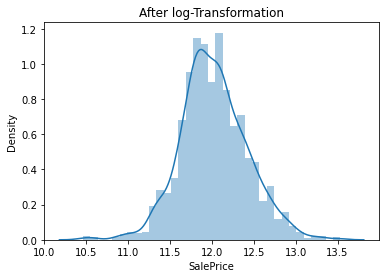

In [33]:
'''Transformation on Target variable'''

dataset["SalePrice"] = np.log(dataset["SalePrice"])
print(f"The Target varibale is skewed by {dataset.SalePrice.skew()}")
sns.distplot(dataset.SalePrice, kde=True)
plt.title('After log-Transformation')
plt.show()

### Multicollinearity check

In [33]:
'''Multi-collinearity check'''
# Top 10 Hightly correlated variables for Target1 DataFrame.
Corr_matrix = dataset.corr()

#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
Top = (Corr_matrix.where(np.triu(np.ones(Corr_matrix.shape), k=1).astype(np.bool)))
Top = Top.unstack().reset_index().dropna()

# Define the names of the columns and store the top 10 values in dataframe "Top".
Top.columns = ["Feature-1", "Feature-2", "Correlation"]
Top["Corr_abs"] = abs(Top["Correlation"])
Top.sort_values(by = "Corr_abs", ascending =False, inplace = True)
Top.head()

,Feature-1,Feature-2,Correlation,Corr_abs
681,GarageArea,GarageCars,0.882475,0.882475
551,TotRmsAbvGrd,GrLivArea,0.825489,0.825489
278,1stFlrSF,TotalBsmtSF,0.819530,0.819530
602,GarageYrBlt,YearBuilt,0.781662,0.781662
881,SalePrice,GrLivArea,0.700927,0.700927


In [34]:
'''Drop features that are highly correlated'''
dataset.drop(columns = ["GarageArea","TotRmsAbvGrd","1stFlrSF","GarageYrBlt"], inplace=True)
# dataset.drop(columns = ["GarageYrBlt"], inplace=True)

In [35]:
'''Some features belong to ordinal datatype'''
ordinal = ["OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond",
           "BsmtExposure","HeatingQC","KitchenQual","GarageQual","GarageCond"]

In [36]:
'''Convert into ordinal datatype'''
label_encoder = LabelEncoder()
for column in ordinal:
    dataset[column] = label_encoder.fit_transform(dataset[column])
dataset[ordinal] = dataset[ordinal].astype(str)

In [37]:
'''Year column'''
def f(x,y,z):
    if x-y == x-z: return "no"
    return "yes"

dataset["Remod"] =  np.vectorize(f)(dataset["YrSold"], dataset["YearRemodAdd"], dataset["YearBuilt"])

In [38]:
'''Drop Years columns'''
dataset.drop(columns=["YearBuilt","YearRemodAdd","YrSold"], inplace=True)

### Dummy variable creation

In [39]:
y = dataset.pop("SalePrice")
X = dataset

In [40]:
'''Scaling on dataset'''
numerical_column = [col for col in X.columns if X[col].dtypes == np.int64 or X[col].dtypes == "float"]
print(numerical_column,end="")
rs = RobustScaler()
dataset[numerical_column] = rs.fit_transform(dataset[numerical_column])

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold']

In [41]:
dummy = [column for column in X.columns if column not in ordinal and dataset[column].dtypes=="object"]
X = pd.get_dummies(X,columns=dummy, drop_first=True).reset_index(drop=True)
print(dummy)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition', 'Remod']


In [42]:
X.shape , y.shape

((1460, 168), (1460,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=322)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(1168, 168) (292, 168)
(1168,) (292,)


## Model Building

### RFE
Recursive feature elimination

In [44]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 89),
 ('LotArea', False, 100),
 ('OverallQual', False, 35),
 ('OverallCond', False, 8),
 ('MasVnrArea', False, 102),
 ('ExterQual', False, 88),
 ('ExterCond', False, 86),
 ('BsmtQual', False, 93),
 ('BsmtCond', False, 90),
 ('BsmtExposure', False, 84),
 ('BsmtFinSF1', False, 45),
 ('BsmtFinSF2', False, 118),
 ('BsmtUnfSF', False, 46),
 ('TotalBsmtSF', False, 44),
 ('HeatingQC', False, 80),
 ('2ndFlrSF', False, 7),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 112),
 ('FullBath', False, 6),
 ('HalfBath', False, 18),
 ('BedroomAbvGr', False, 83),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 109),
 ('Fireplaces', False, 68),
 ('GarageCars', True, 1),
 ('GarageQual', False, 107),
 ('GarageCond', False, 50),
 ('WoodDeckSF', False, 73),
 ('OpenPorchSF', False, 77),
 ('EnclosedPorch', False, 117),
 ('ScreenPorch', False, 116),
 ('MoSold', False, 114),
 ('MSSubClass_160', False, 41),
 ('MSSubClass_180', False, 40),
 ('MSSubClass_19

In [46]:
'''These features need to be removed from the dataset'''
feature = X_train.columns[rfe.support_]

In [47]:
'''Top 50 features'''
X_train_rfe = X_train[feature]

In [48]:
# Columns unselected by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'GarageType_none', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageFinish_none', 'PavedDrive_Y', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Other', 'Remod_yes'], dtype='object', length=118)

In [49]:
'''Updating the Training and Testing columns with top50 features'''
X_Test  = X_test[feature]
X_Train = X_train[feature]

In [50]:
lm.fit(X_Train, y_train)
lm.coef_

array([ 0.22039608,  0.05584185, -0.121292  ,  0.09401701,  0.10662662,
        0.17277351,  0.13214218,  0.22829771,  0.19773923,  0.05972489,
        0.65080019,  0.56125394,  0.53869118,  0.49473596,  0.15436275,
        0.18406007,  0.11173559, -0.08264168, -0.18713341, -0.06797487,
       -0.30224848, -0.08612306, -0.11248815,  0.08864438,  0.21130007,
       -0.15510235, -0.1734311 , -0.12321078,  0.21946226,  0.12167388,
        0.07505799,  0.07107032,  0.19268398,  0.05972489,  0.12129025,
        0.22822236,  0.18510772,  0.06339221,  0.09268651,  0.07976171,
       -0.14238232,  0.08033416, -0.05206984, -0.15733223,  0.12882286,
        0.10496669, -0.06293467, -0.06882812,  0.07309428,  0.06168213])

In [51]:
y_pred_train = lm.predict(X_Train)
y_pred_test = lm.predict(X_Test)

metric = []
r2_train_lm = r2_score(y_train, y_pred_train)
print(r2_train_lm)
metric.append(r2_train_lm)

r2_test_lm = r2_score(y_test, y_pred_test)
print(r2_test_lm)
metric.append(r2_test_lm)

rss1_lm = np.sum(np.square(y_train - y_pred_train))
print(rss1_lm)
metric.append(rss1_lm)

rss2_lm = np.sum(np.square(y_test - y_pred_test))
print(rss2_lm)
metric.append(rss2_lm)

mse_train_lm = mean_squared_error(y_train, y_pred_train)
print(mse_train_lm)
metric.append(mse_train_lm**0.5)

mse_test_lm = mean_squared_error(y_test, y_pred_test)
print(mse_test_lm)
metric.append(mse_test_lm**0.5)

0.86956233361911
0.8522705967011539
23.491500509209008
7.767905046692659
0.02011258605240497
0.02660241454346801


### Ridge Regression

In [52]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 92)

In [53]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11, 12, 13, 14, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 11, 12, 13, 14, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
print(ridge_cv.best_params_)

{'alpha': 20}


In [55]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_Train, y_train)
print(ridge.coef_)

[ 0.22108388  0.06882106 -0.07433935  0.109164    0.07021557  0.01650348
  0.01991381  0.06103162  0.04566586  0.00338025  0.09823301  0.01791101
  0.06359339 -0.03296347  0.05502626  0.05537801  0.0346617  -0.00517512
 -0.1247752  -0.05133735 -0.10509016 -0.03180038 -0.0658519   0.03543773
  0.13619843 -0.05885965 -0.05586341 -0.06515851  0.10373335  0.04825191
  0.06976057  0.02732421  0.01157587  0.00338025  0.02593738  0.03190026
  0.0342379   0.03800295  0.05853489  0.03316951 -0.03429955  0.10488567
 -0.0501302  -0.09392494  0.11309092  0.0959598  -0.07896997 -0.0313836
  0.02116203  0.0765233 ]


In [56]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_Train)
y_pred_test = ridge.predict(X_Test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8442656235196495
0.8388019491798192
28.04737531647134
8.476113248423868
0.02401316379834875
0.029027785097342013


### Lasso Regression

In [57]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [58]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.001}


In [60]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_Train, y_train) 

Lasso(alpha=0.001)

In [61]:
lasso.coef_

array([ 0.22759979,  0.06863832, -0.07164326,  0.10372896,  0.07800671,
       -0.        ,  0.        ,  0.04147895,  0.02476942,  0.        ,
        0.14289834,  0.        ,  0.09306657, -0.        ,  0.02750608,
        0.03135219,  0.01359593, -0.        , -0.14274395, -0.0441922 ,
       -0.17192109, -0.01744076, -0.06757071,  0.01558413,  0.16888484,
       -0.06250868, -0.05537118, -0.06808349,  0.15273174,  0.03361815,
        0.06815935,  0.        ,  0.        ,  0.        ,  0.00194717,
        0.        ,  0.02037571,  0.02752439,  0.0597734 ,  0.0286666 ,
       -0.        ,  0.1020804 , -0.05146651, -0.1146159 ,  0.12529055,
        0.10800302, -0.07548907, -0.00505634,  0.        ,  0.06849204])

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_Train)
y_pred_test = lasso.predict(X_Test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8453004469282834
0.8420629723284788
27.86100618472163
8.304642183028637
0.023853601185549342
0.02844055542133095


In [63]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
            'Linear Regression': metric
            }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.869562,0.844266,0.845300
1,R2 Score (Test),0.852271,0.838802,0.842063
2,RSS (Train),23.491501,28.047375,27.861006
3,RSS (Test),7.767905,8.476113,8.304642
4,MSE (Train),0.141819,0.154962,0.154446
5,MSE (Test),0.163102,0.170375,0.168643


### Lets observe the changes in the coefficients after regularization

In [64]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [65]:
betas.rows = X_train_rfe.columns

In [66]:
betas['Linear']  = lm.coef_
betas['Ridge']   = ridge.coef_
betas['Lasso']   = lasso.coef_

In [67]:
pd.set_option('display.max_rows', None)
betas.head()

,Linear,Ridge,Lasso
GrLivArea,0.220396,0.221084,0.227600
BsmtFullBath,0.055842,0.068821,0.068638
KitchenAbvGr,-0.121292,-0.074339,-0.071643
GarageCars,0.094017,0.109164,0.103729
MSSubClass_20,0.106627,0.070216,0.078007


### Conclusion

    Top 10 Features that are usefull in prediction are- 
    * 'GrLivArea'
    * 'BsmtFullBath'
    * 'KitchenAbvGr'
    * 'GarageCars'
    * 'MSSubClass_20'
    * 'MSSubClass_50'
    * 'MSSubClass_60'
    * 'MSSubClass_70'
    * 'MSSubClass_80
    * 'MSSubClass_90'
    
    
<b>Ridge Regression</b>
    
    * R2Score(Train) : 0.844266
    * R2Score(Test)  : 0.838802
    
<b>Lasso Regression</b>
 
    * R2Score(Train) : 0.845300
    * R2Score(Test)  : 0.842063
    
<b>Optimal Value for Ridge and Lasso are below:</b>
    
    * Alpha value for Ridge Regression : 20
    * Alpha value for Lasso Regression : 0.001

# Subjective Questions

<b>Question 1</b>

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [68]:
print("optimal value of alpha for ridge is {0} , and {1} for lasso. ".format(ridge_cv.best_params_, lasso_cv.best_params_))

optimal value of alpha for ridge is {'alpha': 20} , and {'alpha': 0.001} for lasso. 


In [69]:
'''Doubling the values of alpha '''
# Ridge
alpha = 2*20
r = Ridge(alpha=alpha)
r.fit(X_Train, y_train) 

'''Lets calculate some metrics such as R2 score, RSS and RMSE'''

Y_pred_train = r.predict(X_Train)
y_pred_test = r.predict(X_Test)

ridge_metrics = []
r2_train_lr = r2_score(y_train, Y_pred_train)
print(r2_train_lr)
ridge_metrics.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_metrics.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - Y_pred_train))
print(rss1_lr)
ridge_metrics.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_metrics.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, Y_pred_train)
print(mse_train_lr)
ridge_metrics.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_metrics.append(mse_test_lr**0.5)

0.8333103728095435
0.8307130651185514
30.020388823808005
8.901442816665108
0.02570238769161644
0.03048439320775722


In [70]:
'''Doubling the values of alpha '''
# Lasso
alpha = 2*0.001
l = Lasso(alpha=alpha)
l.fit(X_Train, y_train) 

'''Lets calculate some metrics such as R2 score, RSS and RMSE'''

y_pred_train = l.predict(X_Train)
y_pred_test = l.predict(X_Test)

lasso_metrics = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metrics.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metrics.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metrics.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metrics.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metrics.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metrics.append(mse_test_lr**0.5)

0.8307053661290995
0.8362257483679256
30.489544072119823
8.611574997006983
0.026104061705582042
0.029491695195229393


In [71]:
# Creating a table which contain all the metrics

r_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
          'Ridge Regression': ridge_metrics}

r_metric = pd.DataFrame(r_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

Ques1 = pd.concat([r_metric, ls_metric], axis = 1)

In [72]:
'''Top 10 Features of lasso regression for doubled alpha'''

lasso_param_df = pd.DataFrame({'Features':X_Train.columns, 'Coeficient':l.coef_})
lasso_param_df.sort_values('Coeficient', ascending=False).reset_index(drop=True).head(10)
lasso_param_df.head(10)

,Features,Coeficient
0,GrLivArea,0.227294
1,BsmtFullBath,0.071663
2,KitchenAbvGr,-0.072843
3,GarageCars,0.114862
4,MSSubClass_20,0.070458
5,MSSubClass_50,-0.000000
6,MSSubClass_60,-0.000000
7,MSSubClass_70,0.003910
8,MSSubClass_80,0.000000
9,MSSubClass_90,-0.000000


In [73]:
'''Top 10 Features of lasso regression for optimal value of alpha'''

lasso_param = pd.DataFrame({'Features':X_Train.columns, 'Coeficient':lasso.coef_})
lasso_param.sort_values('Coeficient', ascending=False).reset_index(drop=True)
lasso_param.head(10)

,Features,Coeficient
0,GrLivArea,0.227600
1,BsmtFullBath,0.068638
2,KitchenAbvGr,-0.071643
3,GarageCars,0.103729
4,MSSubClass_20,0.078007
5,MSSubClass_50,-0.000000
6,MSSubClass_60,0.000000
7,MSSubClass_70,0.041479
8,MSSubClass_80,0.024769
9,MSSubClass_90,0.000000


In [74]:
'''Most important preditor variables'''
lasso_param_df["Features"][:10].to_list()

['GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'GarageCars',
 'MSSubClass_20',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_80',
 'MSSubClass_90']

By comparing the metrics table of double the alpha and the optimal alpha, we can see that R-squared value has gone down    by 2%.
The most important predictor variables after doubling the alpha are - ['GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'GarageCars',
 'MSSubClass_20',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_80',
 'MSSubClass_90']

<b>Question 2</b>

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [75]:
Ques2 = final_metric.drop(columns="Linear Regression")
Ques2

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.844266,0.845300
1,R2 Score (Test),0.838802,0.842063
2,RSS (Train),28.047375,27.861006
3,RSS (Test),8.476113,8.304642
4,MSE (Train),0.154962,0.154446
5,MSE (Test),0.170375,0.168643


       Compare two models, we have to choose by using accuracy(R2score,as per regression) or Mean Squared Error or 
       F-statistic/ANOVA test.
       The model having least mean squared error is considered to be the good fit. Similarly, higher the R-squared value,
       good model it is. Hence,"Lasso Regression" is a best model as it has least MSE and high R2score/R-squared value 
       among all regression models.
       
       As Lasso regression that helps in feature elimination and the model is more robust, now. The main advantage of
       Lasso regression is it can produce many solutions to the same problem.

<b>Question 3</b>

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [76]:
'''Top5 variables'''
Top5 = lasso_param["Features"][0:5]
Top5

0        GrLivArea
1     BsmtFullBath
2     KitchenAbvGr
3       GarageCars
4    MSSubClass_20
Name: Features, dtype: object

In [77]:
'''Exclude top5 variables'''
df = X_Train.copy()
df.drop(columns = Top5, inplace=True)
df.shape

(1168, 45)

In [78]:
lazzo = Lasso()

In [79]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006,0.0007, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                    1.0, 2.0, 3.0, 4.0, 5.0, 50, 100, 500, 1000 ]}
# cross validation
model = GridSearchCV(estimator = lazzo, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model.fit(df, y_train) 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 1.0, 2.0, 3.0, 4.0, 5.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model.best_params_)

{'alpha': 0.0001}


In [81]:
alpha = 0.0001

lazzo = Lasso(alpha=alpha)
lazzo.fit(df, y_train) 

Lasso(alpha=0.0001)

In [82]:
'''Top5 features of lazzo model'''
Ques3 = pd.DataFrame({'Features':df.columns, 'Coefficient':lazzo.coef_})
Ques3 = Ques3.sort_values(by = 'Coefficient', ascending=False).head()
Ques3

,Features,Coefficient
5,MSZoning_FV,0.442375
7,MSZoning_RL,0.373481
18,Neighborhood_NoRidge,0.373152
6,MSZoning_RH,0.335900
19,Neighborhood_NridgHt,0.326057


In [83]:
Ques3["Features"].to_list()

['MSZoning_FV',
 'MSZoning_RL',
 'Neighborhood_NoRidge',
 'MSZoning_RH',
 'Neighborhood_NridgHt']

The top 5 most predictor variables are -['MSZoning_FV',
 'MSZoning_RL',
 'Neighborhood_NoRidge',
 'MSZoning_RH',
 'Neighborhood_NridgHt']

<b>Question 4</b>

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The best model is said to be robust and generalizable is when outliers doesn't impact model. We have to make sure that the model is generalisable so that the train accuracy is always greater than test score. As the accuracy of the model depends on the outliers present in the data. So, its better to make a generalised analysis on outlier and scale accordingly. Few scaling techniques like robust scaler, standard scaler make the model more generalised to scale the outlier and thus, increases the accuracy on the prediction made by the model. At times Confidence Intervals within 3 Standard Deviation is usefull to make model robust.

In [84]:
# s = "The best model is said to be robust and generalizable is when outliers doesn't impact model. We have to make sure that the model is generalisable so that the train accuracy is always greater than test score. As the accuracy of the model depends on the outliers present in the data. So, its better to make a generalised analysis on outlier and scale accordingly. Few scaling techniques like robust scaler, standard scaler make the model more generalised to scale the outlier and thus, increases the accuracy on the prediction made by the model. At times Confidence Intervals within 3 Standard Deviation is usefull to make model robust."
# len(s.split(" "))